<a href="https://colab.research.google.com/github/vicabc/sloan-DR14/blob/main/unificado_roccurveswith_without_redshift.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*   Sloan Digital Sky Survey DR14 para classificação de quasares, galáxias e estrelas.
*   Dados coletados entre julho de 2014 - 2016.
*   Intuito de mapear o céu.
*   Apache Point Observatory (APO)


**Observações sobre o SDSS DR14**:

A tabela resulta de duas visualizações: "PhotoObj" que contém dados fotométricos e "SpecObj" que contém dados espectrais. Iniciaremos detalhando "PhotoObj":

- objid = identificador de objeto #transformar em inteiro
- ra = Ascensão Reta J2000 (banda r)
- dec = Declinação J2000 (banda r)
- O sistema de magnitude astronômica Thuan-Gun: u, g, r, i, z representam a resposta das 5 bandas do telescópio.
- run = número de execução
- rerun = número de reexecução
- camcol =  camêra coluna
- field = número do campo

Estes últimos 4 são recursos que descrevem um campo dentro de uma imagem obtida pelo SDSS. Um campo é basicamente uma parte da imagem inteira correspondendo a 2048 por 1489 pixels. Ele pode ser representado pelo número run, que identifica a verificação específica; a camcol, que é basicamente um range entre 1 a 6, números que identificam a linha de varredeura dentro da execução; o número do campo, que normalmente começa em 11 (após um tempo alavancagem inicial) e pode chegar a 800 para execuções particularmente longas; e por fim, o rerun que especifica como a imagem foi processada.
Então, temos agora dados "SpecObj":

- specobjid = identificador do objeto
- classe = classe de objeto (objeto de galáxia, estrela ou quasar)
- redshift = Redshift final
- placa = número da placa
- mjd = data juliana modificada de observação
- fibreid = ID de fibra ótica

O desvio para o vermelho (redshift) acontece quando a luz ou outra radiação eletromagnética de um objeto é aumentada em comprimento de onda ou deslocada para a extremidade vermelha do espectro. Observe que nas 5 primeiras colunas mostradas, existem redshifts negativos, o que significa na verdade: blueshift, ou seja, desvio para o azul. Em outras palavras, o redshift para esse dataset indica que os objetos estão se afastando do observador e no blueshift, estão se aproximando.
Cada exposição espectroscópica emprega uma grande e fina placa de metal circular que posiciona as fibras ópticas por meio de orifícios perfurados nas localizações das imagens no plano focal do telescópio. Essas fibras então alimentam os espectrógrafos. Cada placa possui um número de série exclusivo, que é chamado de placa em visualizações como SpecObj no CAS.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sloan = pd.read_csv('/content/sloan10')

In [3]:
sloan.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [4]:
sloan['class'].value_counts()

GALAXY    4998
STAR      4152
QSO        850
Name: class, dtype: int64

In [5]:
sloan.describe()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.237650e+18,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,301.0,3.648700,302.380100,1.645022e+18,0.143726,1460.986400,52943.533300,353.069400
std,0.000000e+00,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,0.0,1.666183,162.577763,2.013998e+18,0.388774,1788.778371,1511.150651,206.298149
min,1.237650e+18,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,301.0,1.000000,11.000000,2.995780e+17,-0.004136,266.000000,51578.000000,1.000000
25%,1.237650e+18,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,301.0,2.000000,184.000000,3.389248e+17,0.000081,301.000000,51900.000000,186.750000
50%,1.237650e+18,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,301.0,4.000000,299.000000,4.966580e+17,0.042591,441.000000,51997.000000,351.000000
75%,1.237650e+18,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,301.0,5.000000,414.000000,2.881300e+18,0.092579,2559.000000,54468.000000,510.000000
max,1.237650e+18,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,301.0,6.000000,768.000000,9.468830e+18,5.353854,8410.000000,57481.000000,1000.000000


Aqui montamos os 4 índices de cores que utilizaremos (u-g,g-r,r-i,i-z), derivado do seguinte plot:
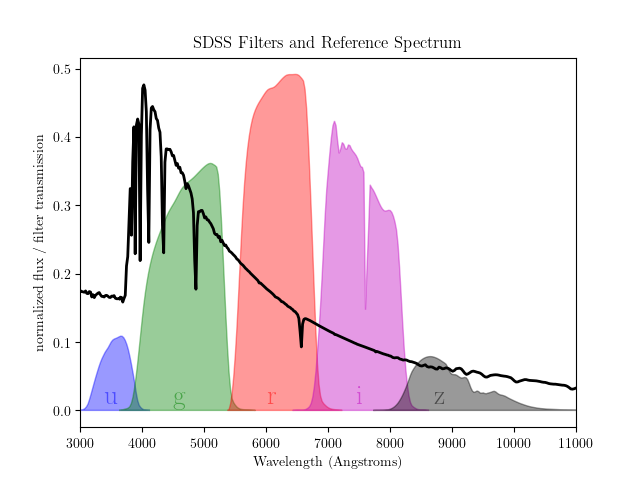

In [6]:
#Criamos os índices de cores

sloan['u-g'] = sloan['u'] - sloan['g']
sloan['g-r'] = sloan['g'] - sloan['r']
sloan['r-i'] = sloan['r'] - sloan['i']
sloan['i-z'] = sloan['i'] - sloan['z']

In [7]:
featuredf = sloan.drop(['u','r','i','z','g','redshift','class','fiberid','objid','run','rerun','ra','dec','specobjid','camcol','field','plate','mjd'], axis=1)

featurecols = list(featuredf)
featurecols

['u-g', 'g-r', 'r-i', 'i-z']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

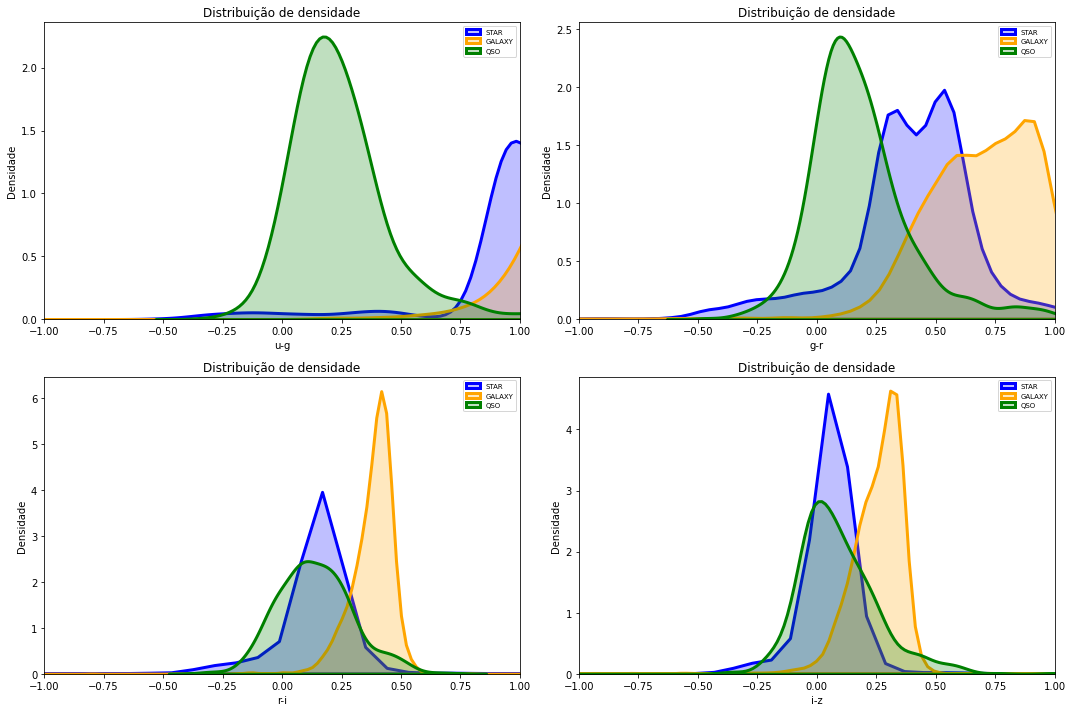

In [8]:
astrObjs = sloan['class'].unique()
colours = ['blue', 'orange', 'green']
plt.figure(figsize=(15,10))
for i in range(len(featurecols)):
    plt.subplot(2, 2, i+1)
    for j in range(len(astrObjs)):
        sns.distplot(sloan[sloan['class']==astrObjs[j]][featurecols[i]], hist = False, kde = True, color = colours[j], kde_kws = {'shade': True, 'linewidth': 3}, label = astrObjs[j])
    plt.legend(fontsize = 7) 
    plt.title('Distribuição de densidade')
    plt.xlabel(featurecols[i])
    plt.ylabel('Densidade')
    plt.xlim(-1,1)
plt.tight_layout()

Text(0, 0.5, 'Densidade')

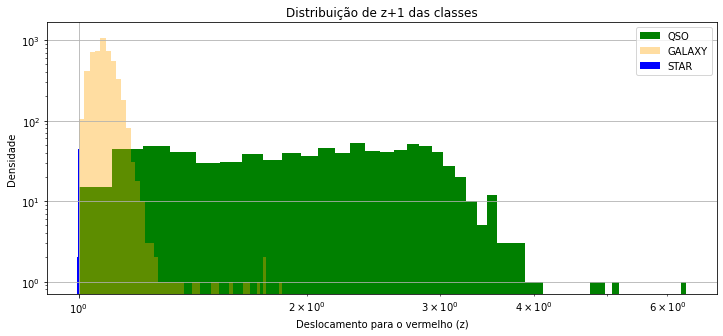

In [15]:
#Plot de densidade dos quasares

luminous3 = sloan[sloan['class'] == 'QSO']
sloan['redclass']= (luminous3['redshift']+1)
sloan["redclass"].hist(bins=50,figsize=(12,5),label='QSO',color='green')
plt.rcParams["figure.figsize"] = (16, 10)
plt.legend()
plt.title('Distribuição de z+1 das classes')
plt.xlabel('Deslocamento para o vermelho (z)')
plt.ylabel('Densidade')
plt.xscale("log")

#Plot de densidade das galáxias

luminous2 = sloan[sloan['class'] == 'GALAXY']
sloan['redclass']= (luminous2['redshift']+1)
sloan["redclass"].hist(bins=50,figsize=(12,5),label='GALAXY',color='orange',alpha = 0.37)
plt.rcParams["figure.figsize"] = (16, 10)
plt.legend()
plt.xlabel('Deslocamento para o vermelho (z)')
plt.ylabel('Densidade')
plt.xscale("log")
plt.yscale("log")

#Plot de densidade das estrelas

luminous1 = sloan[sloan['class'] == 'STAR']
sloan['redclass']= (luminous1['redshift']+1)
sloan["redclass"].hist(bins=50,figsize=(12,5),label='STAR',color='blue')
plt.rcParams["figure.figsize"] = (16, 10)
plt.legend()
plt.xlabel('Deslocamento para o vermelho (z)')
plt.ylabel('Densidade')

#fazer a distribuição de densidade para a banda r, para entendermos como está distruído 

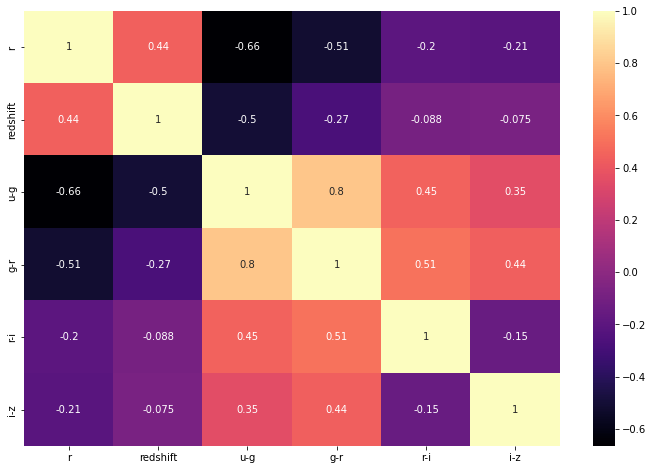

In [17]:
 #Heatmap de todas as informações
sloan_alt = sloan.drop(['u','i','z','g','class','fiberid','objid','run','rerun','ra','dec','specobjid','camcol','field','plate','mjd','redclass'], axis=1) #so fazer esse drop uma fez

sloan_corr = sloan_alt.corr()
plt.rcParams["figure.figsize"] = (12, 8)
sns.heatmap(sloan_corr,annot=True, cmap="magma")

Agora buscaremos ensinar a máquina utilizando a variação entre 2 labels e 3 objetivos

In [19]:
#utilizaremos um método para retornar ou 0 ou 1 caso o target seja deveras nosso alvo

classes=sloan['class']
OHE = pd.get_dummies(classes)

In [20]:
sloan_alt['estrelas']=OHE['STAR']
sloan_alt['galáxias']=OHE['GALAXY']
sloan_alt['qso']=OHE['QSO']
sloan_alt


,r,redshift,u-g,g-r,r-i,i-z,estrelas,galáxias,qso
0,15.94699,-0.000009,2.43166,1.09541,0.44357,0.27811,1,0,0
1,16.67637,-0.000055,1.44831,0.53812,0.18715,0.09772,1,0,0
2,17.47428,0.123111,1.19129,0.71741,0.38696,0.28607,0,1,0
3,16.16116,-0.000111,1.16264,0.44156,0.17883,0.07795,1,0,0
4,16.43869,0.000590,1.28683,-0.17527,-0.11623,-0.05834,1,0,0
...,...,...,...,...,...,...,...,...,...
9995,16.91508,0.027583,1.34724,0.55545,0.23203,0.17735,0,1,0
9996,17.07692,0.117772,0.83406,0.36157,0.36031,0.01764,0,1,0
9997,17.51872,-0.000402,0.98034,0.25912,0.08570,0.01254,1,0,0
9998,17.53152,0.014019,0.97219,0.37916,0.16868,0.22296,0,1,0


In [21]:
#Treinamos a máquina para classificar inicialmente estrelas para os 2 labels diferentes

X=sloan_alt[['u-g','g-r','r-i','i-z']] #label (parâmetros)
X1=sloan_alt[['u-g','g-r','r-i','i-z','redshift']] #label (parâmetros
y=sloan_alt['estrelas'] #target (objetivo)

#separamos nossos dados em treino e teste

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)
X1_train,X1_test,y1_train,y1_test = train_test_split(X1,y,test_size=0.3,random_state=42)


In [22]:
#Importar Modelo de Floresta Aleatória

from sklearn.ensemble import RandomForestClassifier

#Criar um classificador gaussiano

clf=RandomForestClassifier()
clf1=RandomForestClassifier()

#Treine o modelo usando os conjuntos de treinamento: y_pred=clf.predict(X_test)

clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

clf1.fit(X1_train,y1_train)
y1_pred=clf1.predict(X1_test)

In [24]:
# Descobrimos os scores através do cross validation

from sklearn.model_selection import cross_val_predict
y_scores = cross_val_predict(clf, X_train, y_train, cv=3,method="predict_proba")
y_scores1 = cross_val_predict(clf1, X1_train, y1_train, cv=3,method="predict_proba")

ROC CURVE:

 é uma representação gráfica que ilustra o desempenho de um sistema classificador binário à medida que o seu limiar de julgamento altera.

In [25]:
#Plotamos as ROC Curver e suas respectivas áreas abaixo da curva demonstrando quão eficiente foi o treinamento/validação

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

y_scores_forest = y_scores[:, 1] # score = proba of positive class
y_scores_forest1 = y_scores1[:, 1]

fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train,y_scores_forest)
fpr_forest1, tpr_forest1, thresholds_forest1 = roc_curve(y1_train,y_scores_forest1)

lr_auc = roc_auc_score(y_train,y_scores_forest)
lr_auc1 = roc_auc_score(y1_train,y_scores_forest1)


Mudamos o alvo para galáxias e depois quasares e repitimos o processo para os 2 labels:

In [26]:
X3=sloan_alt[['u-g','g-r','r-i','i-z']] #label (parâmetros)
X4=sloan_alt[['u-g','g-r','r-i','i-z','redshift']] #label (parâmetros)
y1=sloan_alt['galáxias'] #target (objetivo)

#Treinamos o modelo para os 2 labels diferentes

X3_train,X3_test,y3_train,y3_test = train_test_split(X3,y1,test_size=0.3,random_state=42)
X4_train,X4_test,y4_train,y4_test = train_test_split(X4,y1,test_size=0.3,random_state=42)

In [27]:
#Criar um classificador gaussiano

clf3=RandomForestClassifier()
clf4=RandomForestClassifier()

#Treine o modelo usando os conjuntos de treinamento:

clf3.fit(X3_train,y3_train)
y3_pred=clf.predict(X3_test)

clf4.fit(X4_train,y4_train)
y4_pred=clf4.predict(X4_test)

In [28]:
y_scores3 = cross_val_predict(clf3, X3_train, y3_train, cv=3,method="predict_proba")
y_scores4 = cross_val_predict(clf4, X4_train, y4_train, cv=3,method="predict_proba")

In [29]:
y_scores_forest3 = y_scores3[:, 1] # score = proba of positive class
y_scores_forest4 = y_scores4[:, 1]

fpr_forest3, tpr_forest3, thresholds_forest3 = roc_curve(y3_train,y_scores_forest3)
fpr_forest4, tpr_forest4, thresholds_forest4 = roc_curve(y4_train,y_scores_forest4)

lr_auc3 = roc_auc_score(y3_train,y_scores_forest3)
lr_auc4 = roc_auc_score(y4_train,y_scores_forest4)

In [30]:
X6=sloan_alt[['u-g','g-r','r-i','i-z']] #label (parâmetros)
X7=sloan_alt[['u-g','g-r','r-i','i-z','redshift']] #label (parâmetros)
y2=sloan_alt['qso'] #target (objetivo)

#Treinamos o modelo para os 2 labels diferentes

X6_train,X6_test,y6_train,y6_test = train_test_split(X6,y2,test_size=0.3,random_state=42)
X7_train,X7_test,y7_train,y7_test = train_test_split(X7,y2,test_size=0.3,random_state=42)


In [31]:
#Criar um classificador gaussiano

clf6=RandomForestClassifier()
clf7=RandomForestClassifier()

#Treine o modelo usando os conjuntos de treinamento:

clf6.fit(X6_train,y6_train)
y6_pred=clf.predict(X6_test)

clf7.fit(X7_train,y7_train)
y7_pred=clf7.predict(X7_test)

In [32]:
y_scores6 = cross_val_predict(clf6, X6_train, y6_train, cv=3,method="predict_proba")
y_scores7 = cross_val_predict(clf7, X7_train, y7_train, cv=3,method="predict_proba")

In [33]:
y_scores_forest6 = y_scores6[:, 1] # score = proba of positive class
y_scores_forest7 = y_scores7[:, 1]

fpr_forest6, tpr_forest6, thresholds_forest6 = roc_curve(y6_train,y_scores_forest6) #alterar para dados de teste
fpr_forest7, tpr_forest7, thresholds_forest7 = roc_curve(y7_train,y_scores_forest7)

lr_auc6 = roc_auc_score(y6_train,y_scores_forest6)
lr_auc7 = roc_auc_score(y7_train,y_scores_forest7)

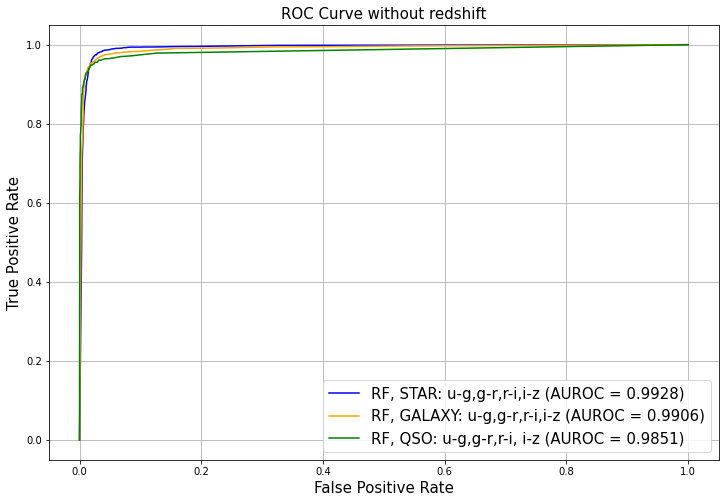

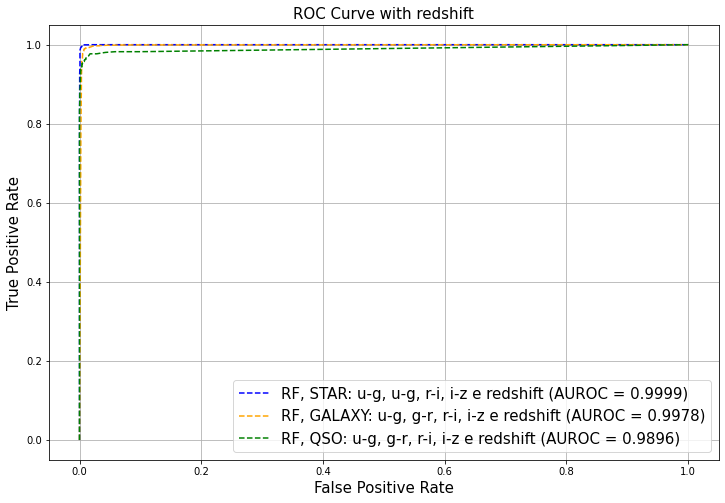

In [34]:
#plotamos todos os modelos treinamos e suas respectivas áreas 
plt.figure(figsize=(12, 8))                                                                  

plt.legend(('STAR', 'GALAXY', 'QSO'))
plt.plot(fpr_forest,tpr_forest,color='blue', label='RF, STAR: u-g,g-r,r-i,i-z (AUROC = %0.4f)' % lr_auc)
plt.plot(fpr_forest3,tpr_forest3, color='orange',label='RF, GALAXY: u-g,g-r,r-i,i-z (AUROC = %0.4f)' % lr_auc3)
plt.plot(fpr_forest6,tpr_forest6,color='green', label='RF, QSO: u-g,g-r,r-i, i-z (AUROC = %0.4f)' % lr_auc6)
pyplot.legend()
plt.legend(fontsize = 15)  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')  
axes = plt.gca()

axes.xaxis.label.set_size(15)
axes.yaxis.label.set_size(15)   
plt.title("ROC Curve without redshift",fontsize=15)           
plt.grid(True)              
plt.show()

plt.figure(figsize=(12, 8))                                                                  

plt.legend(('STAR', 'GALAXY', 'QSO'))
plt.plot(fpr_forest1,tpr_forest1, linestyle='--',color='blue', label='RF, STAR: u-g, u-g, r-i, i-z e redshift (AUROC = %0.4f)' % lr_auc1)
plt.plot(fpr_forest4,tpr_forest4, linestyle='--',color='orange', label='RF, GALAXY: u-g, g-r, r-i, i-z e redshift (AUROC = %0.4f)' % lr_auc4)
plt.plot(fpr_forest7,tpr_forest7, linestyle='--', color='green',label='RF, QSO: u-g, g-r, r-i, i-z e redshift (AUROC = %0.4f)' % lr_auc7)

pyplot.legend()
plt.legend(fontsize = 15)  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')  
axes = plt.gca()

axes.xaxis.label.set_size(15)
axes.yaxis.label.set_size(15)   
plt.title("ROC Curve with redshift",fontsize=15)           
plt.grid(True)              
plt.show()
    

In [35]:
listaauc= [lr_auc,lr_auc1,lr_auc3,lr_auc4,lr_auc6,lr_auc7]
#objetos com linhas diferentes no plot 

In [36]:
rows=[]
for i in range(6):
  listaauc1=listaauc[i]
  rows.append(listaauc1)
  dframe = pd.DataFrame(rows)
dframe.max()
#aqui vemos que a melhor predição feita foi para as estrelas utilizando o label com u-g, r-i e redshift!
#e concluímos que as melhores predições tanto para galáxias quanto quasares também foi utilizando esses 3 labels.

0    0.999903
dtype: float64

Precision e recall são dois números que juntos são usados ​​para avaliar o desempenho de sistemas de classificação ou recuperação de informações. A precisão (pureza) é definida como a fração daqueles que classifiquei como corretos, quantos efetivamente eram. Recall, às vezes chamado de completeza, define quando realmente é da classe X, o quão frequente classifica como X. Um classificador perfeito tem precisão e recall iguais a 1. 

In [37]:
from sklearn.metrics import precision_recall_curve

precisions, recalls,threshold = precision_recall_curve(y_train, y_scores_forest)
precisions1, recalls1, thresholds1 = precision_recall_curve(y1_train, y_scores_forest1)

precisions3, recalls3, thresholds3 = precision_recall_curve(y3_train, y_scores_forest3)
precisions4, recalls4, thresholds4 = precision_recall_curve(y4_train, y_scores_forest4)

precisions6, recalls6, thresholds6 = precision_recall_curve(y6_train, y_scores_forest6)
precisions7, recalls7, thresholds7 = precision_recall_curve(y7_train, y_scores_forest7)


<Figure size 1152x864 with 0 Axes>

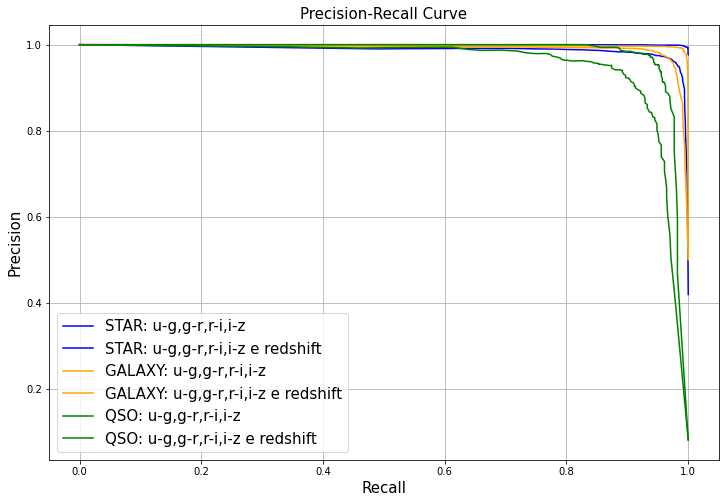

In [38]:
#create precision recall curve

plt.figure(figsize=(16, 12))

fig, ax = plt.subplots()

ax.plot(recalls, precisions, color='blue',label='STAR: u-g,g-r,r-i,i-z')
ax.plot(recalls1, precisions1, color='blue',label='STAR: u-g,g-r,r-i,i-z e redshift')
ax.plot(recalls3, precisions3, color='orange',label='GALAXY: u-g,g-r,r-i,i-z')
ax.plot(recalls4, precisions4, color='orange',label='GALAXY: u-g,g-r,r-i,i-z e redshift')
ax.plot(recalls6, precisions6, color='green',label='QSO: u-g,g-r,r-i,i-z')
ax.plot(recalls7, precisions7, color='green',label='QSO: u-g,g-r,r-i,i-z e redshift')


#add axis labels to plot
ax.set_title('Precision-Recall Curve',fontsize=15)
ax.set_ylabel('Precision',fontsize=15)
ax.set_xlabel('Recall',fontsize=15)

#display plot
plt.legend()
plt.legend(fontsize = 15)  
plt.grid(True)
plt.show()


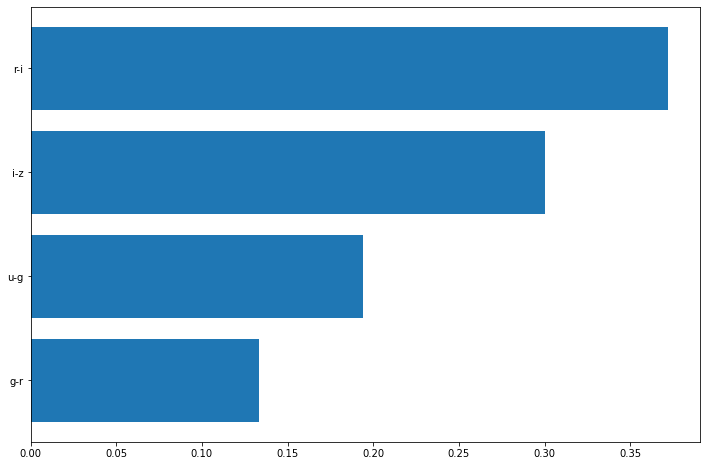

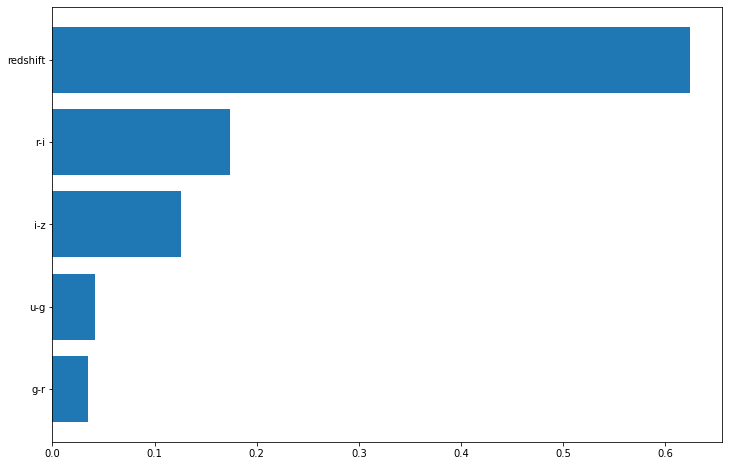

In [ ]:
#Analisamos as características mais importantes das estrelas

importances = clf.feature_importances_
importances1 = clf1.feature_importances_

indices = np.argsort(importances)

fig, ax = plt.subplots()
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(X_train.columns)[indices])

indices1 = np.argsort(importances1)

fig1, ax1 = plt.subplots()
ax1.barh(range(len(importances1)), importances1[indices1])
ax1.set_yticks(range(len(importances1)))
_ = ax1.set_yticklabels(np.array(X1_train.columns)[indices1])

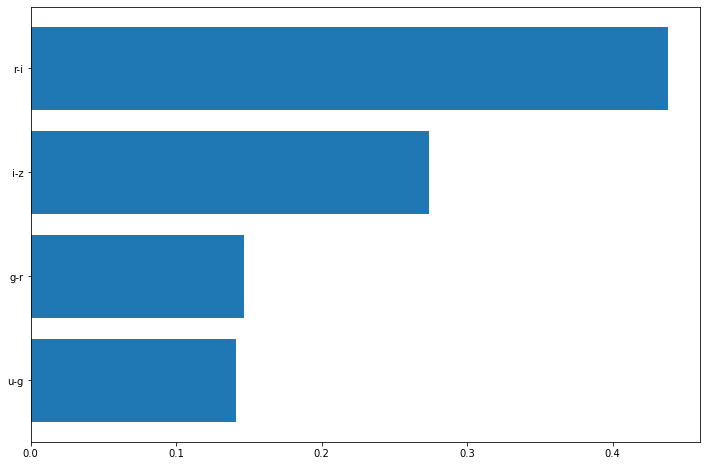

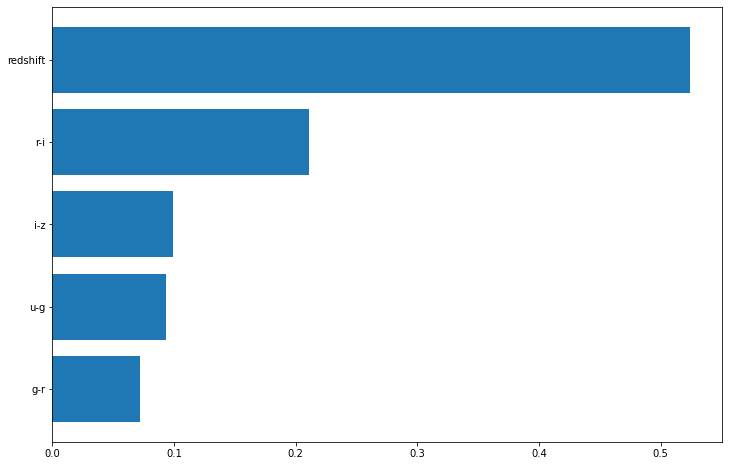

In [41]:
#Analisamos as características mais importantes das galáxias

importances3 = clf3.feature_importances_
importances4 = clf4.feature_importances_

indices3 = np.argsort(importances3)

#fig3, ax3 = plt.subplots(color=('orange'))
fig3, ax3 = plt.subplots()

ax3.barh(range(len(importances3)), importances3[indices3])
ax3.set_yticks(range(len(importances3)))
_ = ax3.set_yticklabels(np.array(X3_train.columns)[indices3])

indices4 = np.argsort(importances4)

fig4, ax4 = plt.subplots()
ax4.barh(range(len(importances4)), importances4[indices4])
ax4.set_yticks(range(len(importances4)))
_ = ax4.set_yticklabels(np.array(X4_train.columns)[indices4])

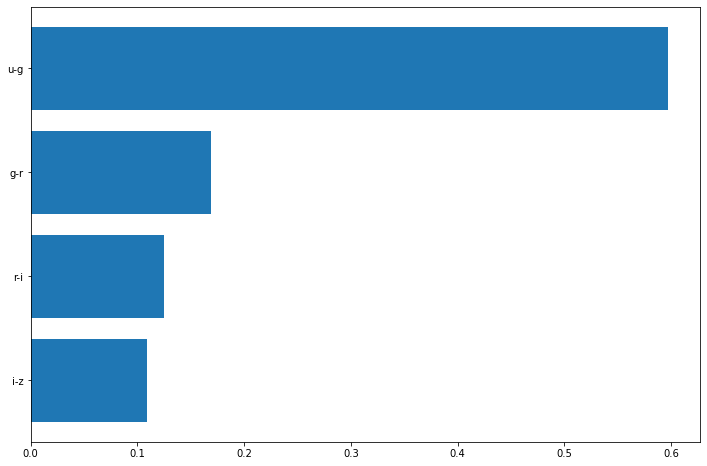

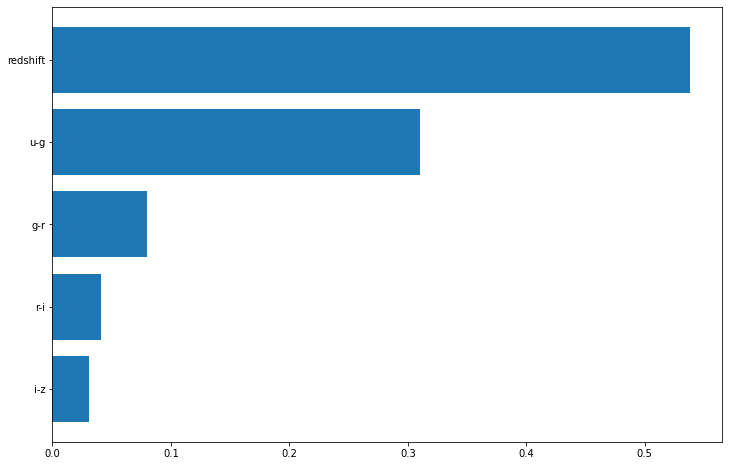

In [42]:
#Analisamos as características mais importantes dos quasares

importances6 = clf6.feature_importances_
importances7 = clf7.feature_importances_

indices6 = np.argsort(importances6)

fig6, ax6 = plt.subplots()
ax6.barh(range(len(importances6)), importances6[indices6])
ax6.set_yticks(range(len(importances6)))
_ = ax6.set_yticklabels(np.array(X6_train.columns)[indices6])

indices7 = np.argsort(importances7)

fig7, ax7 = plt.subplots()
ax7.barh(range(len(importances7)), importances7[indices7])
ax7.set_yticks(range(len(importances7)))
_ = ax7.set_yticklabels(np.array(X7_train.columns)[indices7])

MATRIZ DE CONFUSÃO

In [43]:
from sklearn.metrics import confusion_matrix
#a11 = TN, a12=FP,a21=FN,a22=TP

In [44]:
y_train_pred = cross_val_predict(clf, X_train, y_train, cv=3)
y_train_pred1 = cross_val_predict(clf1, X1_train, y1_train, cv=3)
y_train_pred3 = cross_val_predict(clf3, X3_train, y3_train, cv=3)
y_train_pred4 = cross_val_predict(clf4, X4_train, y4_train, cv=3)
y_train_pred6 = cross_val_predict(clf6, X6_train, y6_train, cv=3)
y_train_pred7 = cross_val_predict(clf7, X7_train, y7_train, cv=3)

In [45]:
dfconf=pd.DataFrame(confusion_matrix(y_train, y_train_pred))
dfconf1=pd.DataFrame(confusion_matrix(y1_train, y_train_pred1))
dfconf3=pd.DataFrame(confusion_matrix(y3_train, y_train_pred3))
dfconf4=pd.DataFrame(confusion_matrix(y4_train, y_train_pred4))
dfconf6=pd.DataFrame(confusion_matrix(y6_train, y_train_pred6))
dfconf7=pd.DataFrame(confusion_matrix(y7_train, y_train_pred7))

oi1= pd.concat([dfconf,dfconf1,dfconf3,dfconf4,dfconf6,dfconf7], axis=1, ignore_index=True)
oi1

,0,1,2,3,4,5,6,7,8,9,10,11
0,3966,99,4048,17,3413,86,3467,32,6399,37,6417,19
1,93,2842,2,2933,136,3365,34,3467,61,503,34,530


A análise acontece da seguinte forma: há cada 2 colunas, é um treinamento diferente. As 6 primeiras colunas estão relacionadas às estrelas, após isso, as outras 6 relacionadas às galáxias e por fim os quasares. 

Vemos o esperado: a predição de estrelas, utilizando os labels u-g,r-i,
redshift, produz a matriz de confusão com o menor número de falsos positivos e falsos negativos, pois é o melhor ajuste. E a predição das galáxias, utilizando somente u-g e r-i produz os maiores números.